The Random Behaviour of Assets

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

# Q1

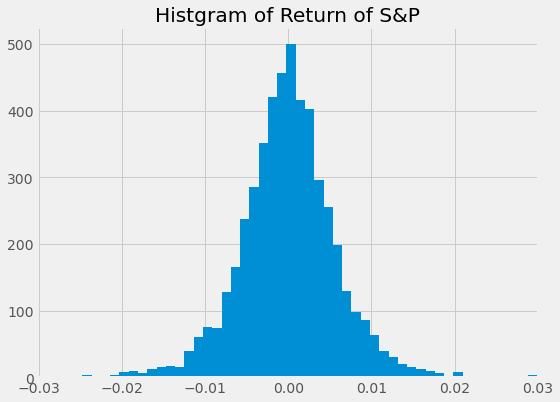

In [183]:
# Step 1. Import and Deal with Date
df_raw = pd.read_csv('CQF_Janaury 2023_M1L1_Excel.csv')
df = df_raw[['Date','Adj Close']]
df = df.set_index(pd.to_datetime(df['Date']))['Adj Close']
df = pd.concat([df, df.pct_change().rename('rate')], axis = 1)

plt.figure(figsize=(8,6))
plt.hist(df.rate,bins = 100)
plt.xlim(df.rate.mean() - 5*df.rate.std(), df.rate.mean() + 5*df.rate.std())
plt.title('Histgram of Return of S&P')
plt.show()

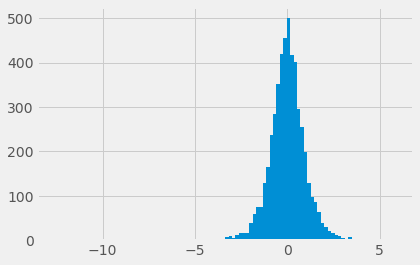

In [184]:
def normal_dist(x, mu=0, sigma=1):
    return 1/np.sqrt( 2*np.pi )/sigma * np.exp( - np.square(x-mu)/2/np.square(sigma) )

bucket_loc = plt.hist(rate_std, bins = 100)[1] # bucket width and location
bucket_loc_nor = normal_dist(bucket_loc)
# Ignore the Figure below

In [314]:
def normal_dist(x, mu=0, sigma=1):
    return 1/np.sqrt( 2*np.pi )/sigma * np.exp( - np.square(x-mu)/2/np.square(sigma) )


def compare_normal_dist(rate, bins=100):
# P.S. Standardised Reture
    rate_std = (rate - rate.mean())/rate.std()
    
    bucket_loc = plt.hist(rate_std, bins = 100)[1] # bucket width and location
    bucket_loc_nor = normal_dist(bucket_loc)
    # Ignore the Figure below

    plt.figure(figsize=(8,6))
    plt.hist(rate_std, bins = bins, label = 'S&P Standardised Return')
    plt.plot(bucket_loc, bucket_loc_nor*len(rate_std)*(bucket_loc[1]-bucket_loc[0])
            , label = 'Standard Normal')
    plt.xlim(-4, 4)
    plt.title('Figure shows the S&P returns have the "Fat-Tail" stylised fact')
    plt.legend(loc='lower right')
    plt.text(x=-3.5,y=300, s="mean = {:-.4f}".format(rate_std.mean()))
    plt.text(x=-3.5,y=250, s="std = {:-.4f}".format(rate_std.std()))
    plt.show()

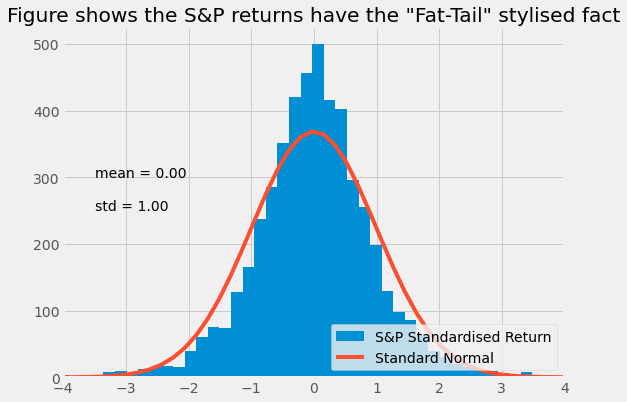

In [185]:
# P.S. Standardised Reture
rate_std = (df.rate - df.rate.mean())/df.rate.std()

plt.figure(figsize=(8,6))
plt.hist(rate_std, bins = 100, label = 'S&P Standardised Return')
plt.plot(bucket_loc, bucket_loc_nor*len(rate_std)*(bucket_loc[1]-bucket_loc[0])
        , label = 'Standard Normal')
plt.xlim(-4, 4)
plt.title('Figure shows the S&P returns have the "Fat-Tail" stylised fact')
plt.legend(loc='lower right')
plt.text(x=-3.5,y=300, s="mean = {:-.2f}".format(rate_std.mean()))
plt.text(x=-3.5,y=250, s="std = {:-.2f}".format(rate_std.std()))
plt.show()

The Hitgram shows nearly normally distributed, which means $R_i$ is close to normal distribution.

In [186]:
df['rate2D']=(df['Adj Close'].shift(2) - df['Adj Close'])/df['Adj Close']
df['rate5D']=(df['Adj Close'].shift(5) - df['Adj Close'])/df['Adj Close']

## (1)

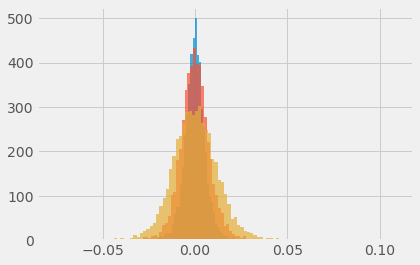

In [190]:
plt.hist(df.rate, bins = 100, alpha=0.7)
plt.hist(df.rate2D, bins = 100, alpha=0.7)
plt.hist(df.rate5D, bins = 100, alpha=0.7)
plt.show()

In [221]:
df_std = (df - df.mean())/df.std()
print('Returns s.d. are')
df.std()

Returns s.d. are


Adj Close    0.235442
rate         0.006023
rate2D       0.008680
rate5D       0.013762
dtype: float64

In [230]:
print('Adjusted Return s.d. are')
print(df.rate.std()/np.sqrt(1/252))
print(df.rate2D.std()/np.sqrt(2/252))
print(df.rate5D.std()/np.sqrt(5/252))

Adjusted Return s.d. are
0.09561621929222071
0.09743641310799787
0.09770115113025735


## (2)

In [219]:
even = df[np.arange(len(df))%2==0] # even loc
odd = df[np.arange(len(df))%2==1] # odd loc

In [223]:
even.mean()

Adj Close    1.554361
rate         0.000015
rate2D       0.000157
rate5D       0.000369
dtype: float64

In [224]:
odd.mean()

Adj Close    1.554352
rate        -0.000111
rate2D       0.000164
rate5D       0.000482
dtype: float64

In [232]:
print('ALL')
print((df.rate/np.sqrt(1/252)).std())
print((df.rate2D/np.sqrt(2/252)).std())
print((df.rate5D/np.sqrt(5/252)).std())
print('----------------------')
print('EVEN')
print((even.rate/np.sqrt(1/252)).std())
print((even.rate2D/np.sqrt(2/252)).std())
print((even.rate5D/np.sqrt(5/252)).std())
print('----------------------')
print('ODD')
print((odd.rate/np.sqrt(1/252)).std())
print((odd.rate2D/np.sqrt(2/252)).std())
print((odd.rate5D/np.sqrt(5/252)).std())

ALL
0.0956162192922209
0.09743641310799793
0.09770115113025732
----------------------
EVEN
0.09702115040345796
0.09746787770593303
0.09868544721640249
----------------------
ODD
0.09419969546712878
0.09742453976649118
0.0967255024714235


## (3)

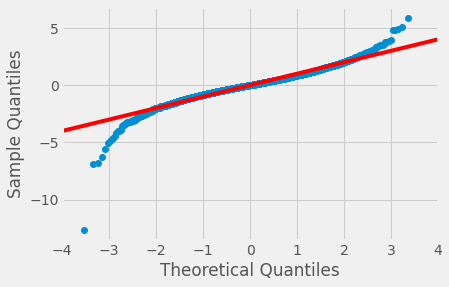

In [250]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot((df.rate - df.rate.mean())/df.rate.std(),line='45' )
plt.xlim(-4,4)
plt.show()

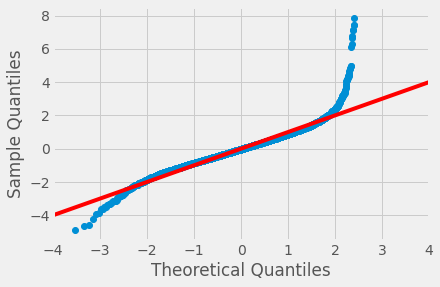

In [249]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot((df.rate5D - df.rate5D.mean())/df.rate5D.std(),line='45' )
plt.xlim(-4,4)
plt.show()

## (4) Done before

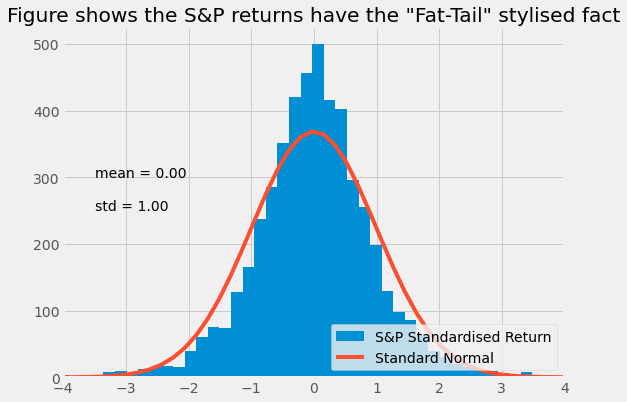

In [251]:
# P.S. Standardised Reture
rate_std = (df.rate - df.rate.mean())/df.rate.std()

plt.figure(figsize=(8,6))
plt.hist(rate_std, bins = 100, label = 'S&P Standardised Return')
plt.plot(bucket_loc, bucket_loc_nor*len(rate_std)*(bucket_loc[1]-bucket_loc[0])
        , label = 'Standard Normal')
plt.xlim(-4, 4)
plt.title('Figure shows the S&P returns have the "Fat-Tail" stylised fact')
plt.legend(loc='lower right')
plt.text(x=-3.5,y=300, s="mean = {:-.2f}".format(rate_std.mean()))
plt.text(x=-3.5,y=250, s="std = {:-.2f}".format(rate_std.std()))
plt.show()

# 2. Log-Return

## (1)

In [333]:
# t = 1, dt = 1/1000
N = 100 
x_line = np.linspace(0,1,N) 


df_log = df['Adj Close']
df_log = pd.concat( [df_log, (  np.log(df_log.shift(1)/df_log)  ).rename('rate')], axis = 1 )
df_log['rate_std'] = ((df_log.rate - df_log.rate.mean())/df_log.rate.std())

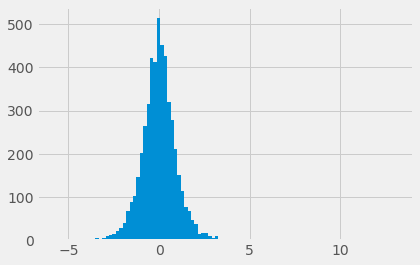

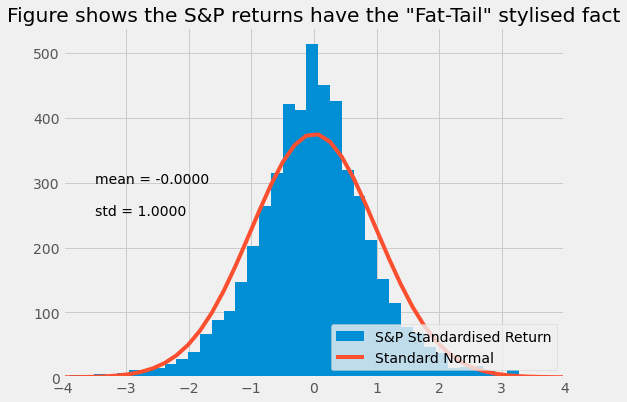

In [334]:
compare_normal_dist(df_log.rate_std)

## (2)

In [338]:
df_log.sort_values('rate_std', ascending=True).dropna()

,Adj Close,rate,rate_std
Date,,,
2008-10-28,1.609010,-0.034848,-5.775539
2022-09-30,1.116944,-0.030308,-5.024387
2020-03-27,1.220063,-0.029063,-4.818439
2017-01-18,1.238804,-0.028480,-4.721977
2022-11-11,1.169563,-0.028399,-4.708609
...,...,...,...
2008-01-12,1.486503,0.034387,5.678548
2009-01-20,1.387752,0.038723,6.395828
2020-03-19,1.162534,0.041806,6.905847


## (3)

In [341]:
normal_dist(-3.74534)

0.00035880754807424896

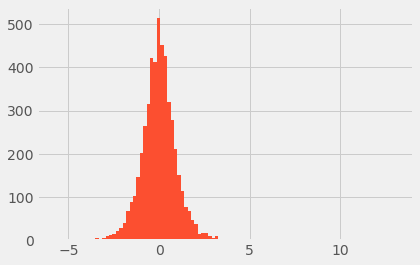

In [369]:
temp_y = plt.hist(df_log.rate_std, bins = N)[0]/len(df_log)
temp_x = plt.hist(df_log.rate_std, bins = N)[1][:N]

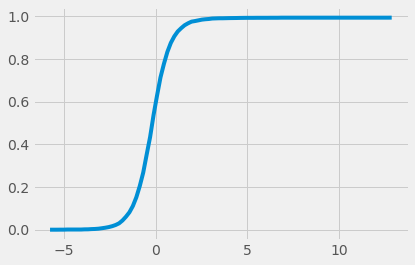

In [374]:
# temp_y = (temp_y - temp_y.mean())/temp_y.std()
plt.plot(temp_x, temp_y.cumsum())

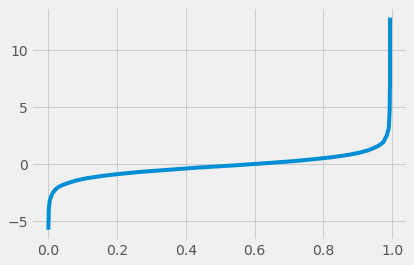

In [380]:
plt.plot(temp_y.cumsum(), temp_x)
# plt.plot(np.linspace(0,1,N), np.linspace(0,1,N))

by Fanyu